<a href="https://colab.research.google.com/github/josefernandezest98/training/blob/main/Gradient_Descent_Gompertz/gradient_descent_gompertz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent for Fruit Growth with Gompertz Model

The Gompertz model is well known and widely used in many aspects of biology. It has been frequently used to describe the growth of animals, fruits and plants, as well as the number or volume of bacteria and cancer cells. Numerous parametrisations and re-parametrisations of varying usefulness are found in the literature, whereof the Gompertz-Laird is one of the more commonly used. The aim of this notebook is to optimize the prediction of models which follow the Gompertz curve model with deep learning, in particular, the gradient descent algorithm.

## Gompertz Curve Model

**Gompertz**

The Gompertz curve or Gompertz function is a type of mathematical model for a time series, named after Benjamin Gompertz (1779–1865). It is a sigmoid function which describes growth as being slowest at the start and end of a given time period. The right-side or future value asymptote of the function is approached much more gradually by the curve than the left-side or lower valued asymptote. This is in contrast to the simple logistic function in which both asymptotes are approached by the curve symmetrically. It is a special case of the generalised logistic function. The function was originally designed to describe human mortality, but since has been modified to be applied in biology, with regard to detailing populations. The Gompertz formula is

$$f\left(t\right) = b_0 e^{-b_1 e^{-b_2 t}},$$

where:

*  $b_0$ is an asymptote, since $\lim_{t\to\infty} b_0 e^{-b_1 e^{-b_2 t}} = b_0 e^0 = b_0.$
*  $b_1$ sets the displacement along the x-axis.
*  $b_2$ sets the growth rate (*y* scaling).
*  $e$ is Euler´s Number $e \approx 2.71828\dots$

Let´s see an example of Gompertz function varying on parameters.

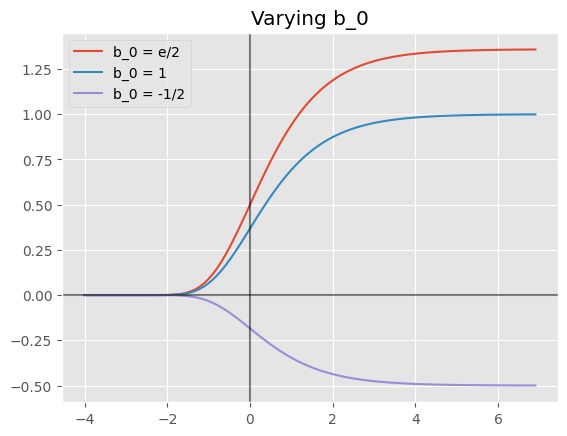

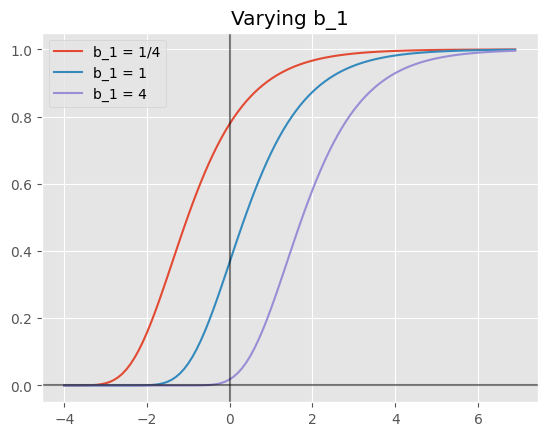

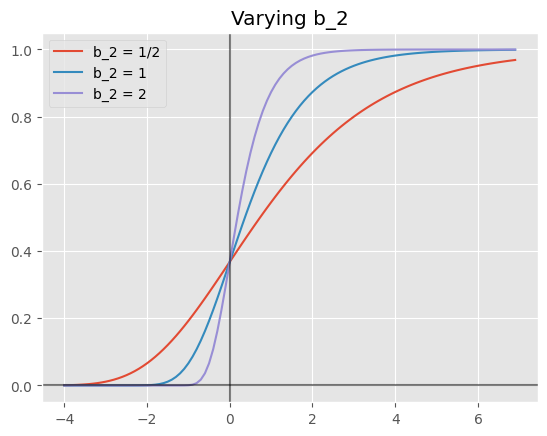

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# MatPlotLib style
plt.style.use('ggplot')

# Gompertz function
def f(t,b_0,b_1,b_2):
  return b_0*np.exp(-b_1*np.exp(-b_2*t))

# Domain, t with negative included
t = np.array([0.1*i for i in range(-40,70)])

# Varying b_0
plt.plot(t,f(t,np.exp(1)/2,1,1),label='b_0 = e/2')
plt.plot(t,f(t,1,1,1),label='b_0 = 1')
plt.plot(t,f(t,-1/2,1,1),label='b_0 = -1/2')
plt.axvline(x = 0, color = 'black', alpha = 0.5)
plt.axhline(y = 0, color = 'black', alpha = 0.5)
plt.legend()
plt.title('Varying b_0')
plt.show()

# Varying b_1
plt.plot(t,f(t,1,1/4,1),label='b_1 = 1/4')
plt.plot(t,f(t,1,1,1),label='b_1 = 1')
plt.plot(t,f(t,1,4,1),label='b_1 = 4')
plt.axvline(x = 0, color = 'black', alpha = 0.5)
plt.axhline(y = 0, color = 'black', alpha = 0.5)
plt.legend()
plt.title('Varying b_1')
plt.show()

# Varying b_2
plt.plot(t,f(t,1,1,1/2),label='b_2 = 1/2')
plt.plot(t,f(t,1,1,1),label='b_2 = 1')
plt.plot(t,f(t,1,1,2),label='b_2 = 2')
plt.axvline(x = 0, color = 'black', alpha = 0.5)
plt.axhline(y = 0, color = 'black', alpha = 0.5)
plt.legend()
plt.title('Varying b_2')
plt.show()

**GADA Gompertz**

The generalized algebraic difference approach (GADA) uses both: two-dimensional functions of explicit time and two-dimensional functions of explicit site to derive a single dynamic equation that is a three-dimensional function of explicit time and implicit site. In this case, we increase the dimension of the equation and reduce the dependence of the initial value $y_0$. Gompertz function in GADA derivation yields

$$f\left(t_0,y_0,t,b_1,b_2\right) = b_1 e^{\left[ \left(\frac{\log\left(\frac{y_0}{b_1}\right)}{e^{-b_2 t_0}}\right)e^{-b_2 t} \right]}.$$

This step will not be proved, but it consists of isolating the parameter $b_0$ in polymorphic shape. For further information go to the bibliography referenced in [1] and [2]. In the future, I would like to go deeper into this section, and write here the GADA proof (although it can be reached following the tasks in [3]).

**Fruit Growth Dataset**

The next dataset consists of the growth caliper registered by twelve fruits over thirty-three days. They all have the same flowering date, and will be collected the same day as well. The data we have is the arithmetic mean on each day, let´s see how it is represented.

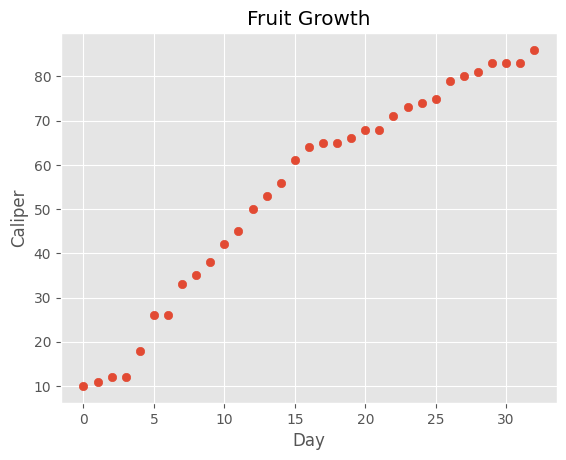

In [ ]:
# Fruit growth by days
y = [10,11,12,12,18,26,26,33,35,38,42,45,50,
     53,56,61,64,65,65,66,68,68,71,73,74,75,
     79,80,81,83,83,83,86]

# Domain, range of days
x = list(range(len(y)))

# Growth plot figure
plt.scatter(x,y)
plt.xlabel('Day')
plt.ylabel('Caliper')
plt.title('Fruit Growth')
plt.show()

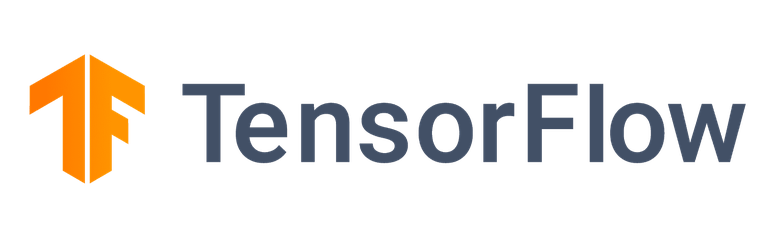

**TensorFlow**

TensorFlow is an open source framework developed by Google researchers to run machine learning, deep learning and other statistical and predictive analytics workloads. For this part of the notebook we are going to use the TensorFlow framework. Let´s define the Gompertz function with TensorFlow.

In [ ]:
# Gompertz function
def f_gompertz(tupla,b1,b2):
   y = b1*tf.math.exp((tf.math.log(tupla[1]/b1)/tf.math.exp(-b2*tupla[0]))*tf.math.exp(-b2*tupla[2]))
   return y

# Gompertz class
class gompertz(tf.Module): # default params (1.0,1.0,1.0)

  def __init__(self, params, **kwargs): # Builder
        super().__init__(**kwargs)
        self.b1 = tf.Variable(params[0],name='b1',trainable=True,dtype=tf.float32)
        self.b2 = tf.Variable(params[1],name='b2',trainable=True,dtype=tf.float32)

  def __call__(self, tupla): # Caller
        return f_gompertz(tupla, self.b1, self.b2)

  def get_variables(self): # Returns params of the model in variable mode
      b1 = self.b1
      b2 = self.b2
      params = (b1,b2)
      return params

  def get_constants(self): # Returns params of the model in constant mode
        b1 = tf.constant(self.b1)
        b2 = tf.constant(self.b2)
        params = (b1, b2)
        return params

  def get_names(self): # Returns names of the params
        return ('b1', 'b2')

## Gompertz Gradient Descent

**Gradient Descent**

Gradient descent (GD) is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function. This method is commonly used in machine learning (ML) and deep learning (DL) to minimise a cost/loss function. Due to its importance and ease of implementation, this algorithm is usually taught at the beginning of almost all machine learning courses.

Gradient descent algorithm does not work for all functions. There are two specific requirements. A function has to be:

*  differentiable: a function is differentiable if it has a derivative for each point in its domain.
*  convex: for two points $x_1, x_2$ the function is convex if for $\lambda \in \left[0,1\right]$ the points verify

$$f\left(\lambda x_1 + \left(1 - \lambda\right)x_2\right) \leq \lambda f\left(x_1\right) + \left(1 - \lambda\right)f\left(x_2\right).$$

It is also possible to use quasi-convex functions with a gradient descent algorithm. However, often they have so-called saddle points. If both conditions are satisfied, then we get a global minimum and our goal consists of reaching it with the gradient descent algorithm.

Before jumping into code one more thing has to be explained, what is a gradient. Intuitively it is a slope of a curve at a given point in a specified direction.

In the case of a univariate function, it is simply the first derivative at a selected point. In the case of a multivariate function, it is a vector of derivatives in each main direction (along variable axes). Because we are interested only in a slope along one axis and we don’t care about others these derivatives are called partial derivatives.

A gradient for an n-dimensional function f(x) at a given point p is defined as follows:

$$\nabla f\left(p\right) = \left[\frac{\partial f}{\partial x_1}\left(p\right), \dots, \frac{\partial f}{\partial x_n}\left(p\right)\right]^\top. $$

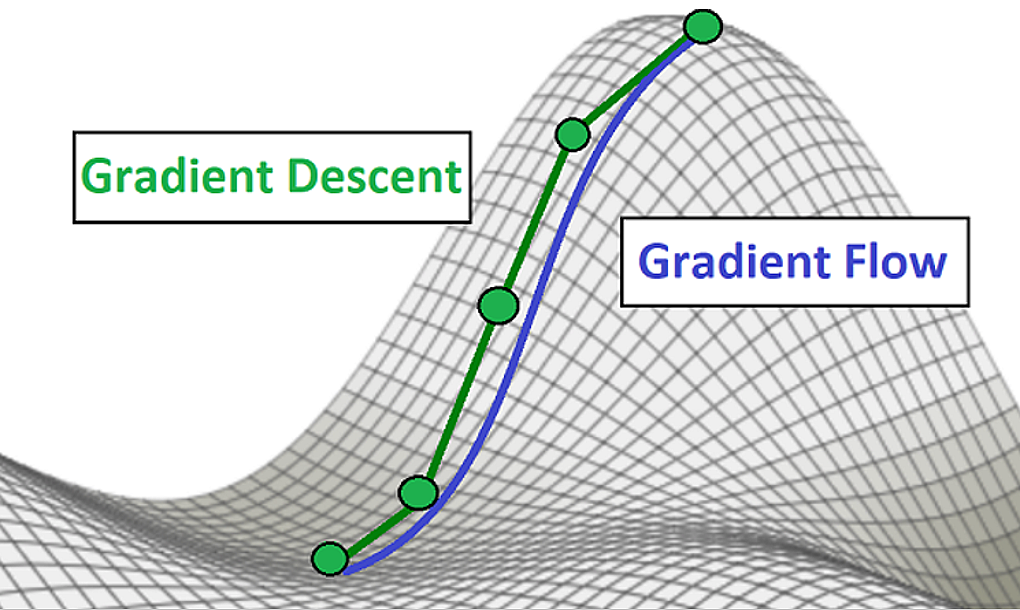

So then, how do we calculate the global minimum?

Gradient Descent Algorithm iteratively calculates the next point using gradient at the current position, scales it (by a learning rate) and subtracts obtained value from the current position (makes a step). It subtracts the value because we want to minimise the function (to maximise it would be adding). This process can be written as:

$$p_{n+1} = p_n - h \nabla f\left(p_n\right),$$

where $h$ scales the gradient and thus controls the step size. In machine learning, it is called learning rate and has a strong influence on performance.

In summary, gradient descent method´s:

1.   Choose a starting point (initialization). This point can be very difficult to attempt.
2.   Calculate gradient at this point.
3.   Make a scaled step in the opposite direction to the gradient (objective: minimise).
4.   Repeat points 2. and 3. until one of the criteria is met: maximum number of iterations reached or step size is smaller than the tolerance (due to scaling or a small gradient).

In our particular case, we have to optimize the params $b_1$ and $b_2$. Moreover, we will use the Momentum Gradient Descent Optimizer in order to accelerate the solution´s convergence.

In [ ]:
# Builds training data, from f(t) to f(t0,y0,t)
def build_predict(x_norm,y_norm):
    t0 = x_norm[0]
    y0 = y_norm[0]
    tam = len(x_norm)
    T0 = tf.constant([t0 for i in range(tam)], dtype=tf.float32)
    Y0 = tf.constant([y0 for i in range(tam)], dtype=tf.float32)
    T = tf.constant(x_norm, dtype=tf.float32)
    X = (T0,Y0,T)
    return X

# Calculates average loss in training gradient descent
def train_loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))

# Calculates percentage loss in training gradient descent
def perc_loss(target_y, predicted_y):
    return 100*tf.reduce_mean(abs(target_y - predicted_y)/target_y)

# Charges the new weights in the model
def upgrade_model(model, params):
    old_vars = model.get_constants()
    variables = model.get_variables()
    tam = len(variables)
    if tam == len(params):
        for i in range(tam):
            variables[i].assign(params[i])
    else:
        print('ERROR upgrade_model: params != model.variables')
    return old_vars

# Calculates the gradients in specified point
def get_gradients(model,x,y,loss=train_loss):
    variables = model.get_variables()
    with tf.GradientTape() as tape:
        [tape.watch(variable) for variable in variables]
        current_loss = loss(y,model(x))
    gradients = tape.gradient(current_loss, variables)
    return gradients

# Reports the gradient descent step
def report_gradient_descent(initial_loss, variables, new_loss, new_values, gradients, epoch, names):
    print('EPOCH ', epoch)
    print('Initial_loss: ', initial_loss.numpy())
    new_names = ['d' + name for name in names]
    new_gradients = [float(gradient.numpy()) for gradient in gradients]
    for i in range(len(new_names)):
        print('   ' + new_names[i] + ':', new_gradients[i])
    print('LOSS: ', new_loss.numpy())
    print(' ')

# Calculates the new weight due to the gradient direction
def function_gradient(parameter,learning_rate,partial_der):
    new_value = parameter - learning_rate * partial_der
    return new_value

# Calculates momentum accelerated gradient-descent
def function_momentum(variable,partial_der,learning_rate,momentum):
    new_value = variable - (learning_rate * partial_der + momentum * learning_rate * partial_der)
    return new_value

# Calculates the new values
def assingment(variables,gradients,learning_rates,function,*args):
    new_values = [function(variables[i], gradients[i], learning_rates[i],*args) for i in range(len(variables))]
    return new_values

# Executes gradient descent in just one iteration
def gradient_descent(model,x,y,learning_rates,method):
    gradients = get_gradients(model, x, y)
    constants = model.get_constants()
    if method == 'gradient_descent':
        new_values = assingment(constants, gradients, learning_rates, function_gradient)
    if method == 'momentum':
        new_values = assingment(constants, gradients, learning_rates, function_momentum, 0.9)
    old_values = upgrade_model(model, new_values)
    return (old_values, new_values, gradients)

# Keeps the best weights
def top_model(initial_vars,initial_loss,current_vars,current_loss):
    if current_loss < initial_loss:
        top = (current_vars,current_loss)
    else:
        top = (initial_vars,initial_loss)
    return top

# Initialized gradient descent algorithm
def init_gradient_descent(model,x,y,learning_rates,method='gradient_descent',loss=train_loss):
    init = False
    while init == False:
        initial_vars = model.get_constants()
        initial_loss = loss(model(x),y)
        (variables, new_values, gradients) = gradient_descent(model,x,y,learning_rates,method)
        new_loss = loss(model(x),y)
        if pd.isna(float(new_loss.numpy())) or np.isinf(float(new_loss.numpy())) or new_loss >= initial_loss:
            upgrade_model(model, initial_vars)
            learning_rates = [learning_rate * 0.1 for learning_rate in learning_rates]
            if learning_rates[1] < 10**(-60):
                upgrade_model(model, initial_vars)
                break
        else:
            initial_vars = new_values
            init = True
            break

    return (initial_vars,learning_rates,init)

# Trains a dataset
def TRAIN(model,x_norm,y_norm,learning_rates,epochs=range(10000),method='momentum',loss=train_loss):
    contador = 0
    Y_test = y_norm
    X_test = build_predict(x_norm, y_norm)
    names = model.get_names()
    #LR_ = []
    (final_values,learning_rates,init) = init_gradient_descent(model, X_test, Y_test, learning_rates)
    print('GRADIENT_DESCENT: train initialized')
    print(' ')
    if init:
        (top_vars,top_loss) = (model.get_constants(),loss(model(X_test),Y_test))
        upgrade_model(model,top_vars)
        for epoch in epochs:
                initial_loss = loss(model(X_test),Y_test)
                (variables, new_values, gradients) = gradient_descent(model, X_test, Y_test, learning_rates, method)
                new_loss = loss(model(X_test),Y_test)
                if epoch % 100 == 0 or epoch <= 10:
                    report_gradient_descent(initial_loss, variables, new_loss, new_values, gradients, epoch, names)
                (top_vars,top_loss) = top_model(top_vars, top_loss, new_values, new_loss)
                upgrade_model(model,top_vars)
                if initial_loss - new_loss < 0.00001 or pd.isna(float(new_loss.numpy())) or np.isinf(float(new_loss.numpy())):
                    learning_rates = [learning_rate * 0.1 for learning_rate in learning_rates]
                    contador = contador + 1
                    if contador > 5:
                         break
    return True

# NOTE: ideas to improve the agorithm:
#     1. Analysis of the convergence area in initializing the algorithm
#     2. Adaptive learning ratio
#     3. Tolerance, epochs and timer included in algorithm as params
#     4. Keep the reports in a buffer and show at least the last ten epochs,
#     to ensure the agorithm works properly (although it has already passed tests)

In [ ]:
# Normalizing x data to fit properly with Gompertz
x_norm = [x[i]/len(x) for i in range(len(x))]
y_norm = [y[i] - y[0] + 1 for i in range(0,len(y))]
GOMPERTZ = gompertz((30.0,1.0,1.0))

# Training
TRAIN(GOMPERTZ,x_norm,y_norm,[0.1,0.1,0.1])

# Prediction
X_test = build_predict(x_norm, y_norm)
Y_test = GOMPERTZ(X_test)

# Weights of the gradient descent model
weights = GOMPERTZ.get_constants()
weights = [weight.numpy() for weight in weights]

GRADIENT_DESCENT: train initialized
 
EPOCH  0
Initial_loss:  746.26086
   db1: -33.202392578125
   db2: 0.8312857151031494
LOSS:  573.47266
 
EPOCH  1
Initial_loss:  573.47266
   db1: -21.527690887451172
   db2: 1.2712191343307495
LOSS:  500.51468
 
EPOCH  2
Initial_loss:  500.51468
   db1: -13.977529525756836
   db2: 1.6181163787841797
LOSS:  469.34308
 
EPOCH  3
Initial_loss:  469.34308
   db1: -9.093960762023926
   db2: 1.8789606094360352
LOSS:  455.65436
 
EPOCH  4
Initial_loss:  455.65436
   db1: -5.9353413581848145
   db2: 2.073471784591675
LOSS:  449.26727
 
EPOCH  5
Initial_loss:  449.26727
   db1: -3.892789125442505
   db2: 2.2208127975463867
LOSS:  445.91522
 
EPOCH  6
Initial_loss:  445.91522
   db1: -2.5724780559539795
   db2: 2.33615779876709
LOSS:  443.80862
 
EPOCH  7
Initial_loss:  443.80862
   db1: -1.719666838645935
   db2: 2.430586576461792
LOSS:  442.19556
 
EPOCH  8
Initial_loss:  442.19556
   db1: -1.169553279876709
   db2: 2.5118861198425293
LOSS:  440.75873
 
E

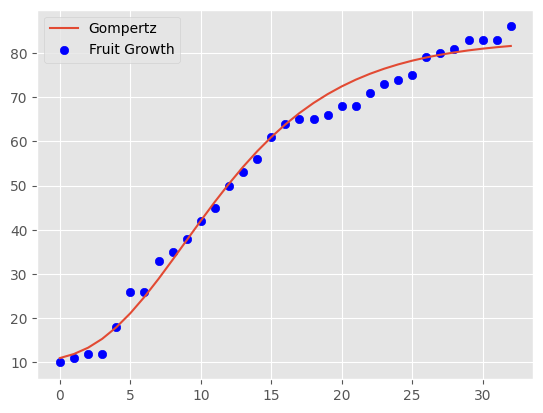

In [ ]:
# Predict
X_test = build_predict(x_norm, y_norm)
Y_test = GOMPERTZ(X_test)
Y_test_ = [elem + y[0] for elem in Y_test]

# Plot prediction against original data
plt.plot(x,Y_test_,label='Gompertz')
plt.scatter(x,y,color='b',label='Fruit Growth')
plt.legend()
plt.show()

## Double Gompertz Curve Model

**Double Gompertz**

Double sigmoid functions have two inflection points that growth rate trend changes from increasing before these points to decreasing after these points. So now, we are going to analyze the Double Gompertz function, although we don´t have the GADA Double Gompertz equation developed yet (this is a challenge not solved yet for me):

$$f(t, c_1, a_1, \alpha_1, \beta_1, a_2, \alpha_2, \beta_2) = c_1 a_1^{-\alpha_1 e^{-\beta_1 t}} + c_1 (a_2 - a_1)^{e^{-\alpha_2 e^{-\beta_2 t}}} - e.$$

Let´s see another dataset this time with two inflection points.

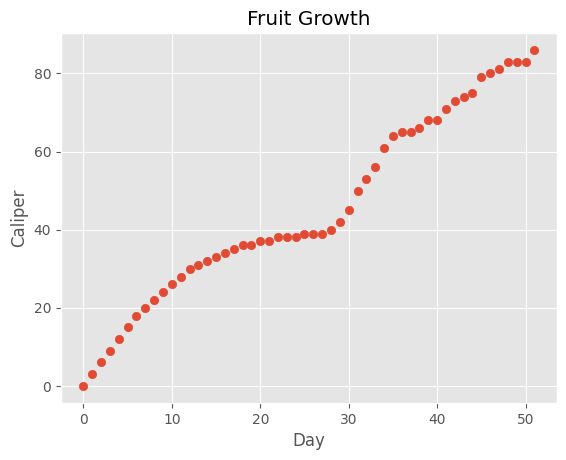

In [ ]:
# Fruit growth by days
y = [0,3,6,9,12,15,18,20,22,24,26,28,30,
     31,32,33,34,35,36,36,37,37,38,38,38,
     39,39,39,40,42,45,50,53,56,61,64,65,
     65,66,68,68,71,73,74,75,79,80,81,83,
     83,83,86]

# Domain, range of days
x = list(range(len(y)))

# Growth plot figure
plt.scatter(x,y)
plt.xlabel('Day')
plt.ylabel('Caliper')
plt.title('Fruit Growth')
plt.show()

In [ ]:
# Double-Gompertz function
def f_double_gompertz(t, c1, a1, alpha1, beta1, a2, alpha2, beta2):
    y = (c1*tf.math.pow(a1,tf.math.exp(-alpha1*tf.math.exp(-beta1*(t)))) + c1*tf.math.pow(a2-a1,tf.math.exp(-alpha2*tf.math.exp(-beta2*(t)))) - tf.math.exp(1.0))
    return y

# Double-Gompertz class
class double_gompertz(tf.Module): # default params (63.003605,0.7386085,-2.3392305,3.3228915,1.268934,-8.005013,2.5601797)

  def __init__(self, params, **kwargs):
        super().__init__(**kwargs)
        self.c1 = tf.Variable(params[0],name='c1',trainable=True)
        self.a1 = tf.Variable(params[1],name='a1',trainable=True)
        self.alpha1 = tf.Variable(params[2],name='alpha1',trainable=True)
        self.beta1 = tf.Variable(params[3],name='beta1',trainable=True)
        self.a2 = tf.Variable(params[4],name='a2',trainable=True)
        self.alpha2 = tf.Variable(params[5],name='alpha2',trainable=True)
        self.beta2 = tf.Variable(params[6],name='beta2',trainable=True)

  def __call__(self, t): # Caller
        return f_double_gompertz(t, self.c1, self.a1, self.alpha1, self.beta1, self.a2, self.alpha2, self.beta2)

  def get_variables(self): # Returns params of the model in variable mode
      c1 = self.c1
      a1 = self.a1
      alpha1 = self.alpha1
      beta1 = self.beta1
      a2 = self.a2
      alpha2 = self.alpha2
      beta2 = self.beta2
      params = (c1,a1,alpha1,beta1,a2,alpha2,beta2)
      return params

  def get_constants(self): # Returns params of the model in constant mode
      c1 = tf.constant(self.c1)
      a1 = tf.constant(self.a1)
      alpha1 = tf.constant(self.alpha1)
      beta1 = tf.constant(self.beta1)
      a2 = tf.constant(self.a2)
      alpha2 = tf.constant(self.alpha2)
      beta2 = tf.constant(self.beta2)
      params = (c1,a1,alpha1,beta1,a2,alpha2,beta2)
      return params

  def get_names(self): # Returns names of the params
      return ('c1', 'a1', 'alpha1', 'beta1', 'a2', 'alpha2', 'beta2')


## Double Gompertz Gradient Descent

In this case, we have to optimize the params $a_1, a_2, c_1, c_2, \alpha_1, \alpha_2, \beta_1, \beta_2$. As we have done before, we will use the Momentum Gradient Descent Optimizer for accelerating the solution´s convergence.

In [ ]:
# New train loss function
def train_loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))

# Train in non GADA model
def TRAIN_2D(model,x_norm,y_norm,learning_rates,epochs=range(10000),method='momentum',loss=train_loss):
    contador = 0
    Y_test = tf.constant(y_norm,dtype=tf.float32)
    X_test = tf.constant(x_norm,dtype=tf.float32)
    names = model.get_names()
    #LR_ = []
    (final_values,learning_rates,init) = init_gradient_descent(model, X_test, Y_test, learning_rates)
    print('GRADIENT_DESCENT: train initialized')
    if init:
        (top_vars,top_loss) = (model.get_constants(),loss(model(X_test),Y_test))
        upgrade_model(model,top_vars)
        for epoch in epochs:
                initial_loss = loss(model(X_test),Y_test)
                (variables, new_values, gradients) = gradient_descent(model, X_test, Y_test, learning_rates, method)
                new_loss = loss(model(X_test),Y_test)
                if epoch % 100 == 0 or epoch <= 10:
                    report_gradient_descent(initial_loss, variables, new_loss, new_values, gradients, epoch, names)
                (top_vars,top_loss) = top_model(top_vars, top_loss, new_values, new_loss)
                upgrade_model(model,top_vars)
                if initial_loss - new_loss < 0.001 or pd.isna(float(new_loss.numpy())) or np.isinf(float(new_loss.numpy())):
                    learning_rates = [learning_rate * 0.1 for learning_rate in learning_rates]
                    contador = contador + 1
                    if contador > 5:
                         break
    return True

In [ ]:
# Normalizing x data to fit properly with Gompertz
x_norm = [x[i]/len(x) for i in range(len(x))]
y_norm = y
DOBLE_GOMPERTZ = double_gompertz((63.003605,0.7386085,-2.3392305,3.3228915,1.268934,-8.005013,2.5601797))

# Training
TRAIN_2D(DOBLE_GOMPERTZ,x_norm,y_norm,[0.1,0.1,0.1,0.1,0.1,0.1,0.1],epochs=range(10000))

# Prediction
Y_test = DOBLE_GOMPERTZ(x_norm)

GRADIENT_DESCENT: train initialized
EPOCH  0
Initial_loss:  85.15202
   dc1: -8.51126480102539
   da1: 249.3992919921875
   dalpha1: 25.073495864868164
   dbeta1: -2.9709737300872803
   da2: -601.7401123046875
   dalpha2: -23.229171752929688
   dbeta2: -153.02072143554688
LOSS:  17.419054
 
EPOCH  1
Initial_loss:  17.419054
   dc1: -4.8346662521362305
   da1: -98.86175537109375
   dalpha1: -22.559900283813477
   dbeta1: -13.841018676757812
   da2: -326.3401794433594
   dalpha2: -8.35767936706543
   dbeta2: -58.866676330566406
LOSS:  10.925724
 
EPOCH  2
Initial_loss:  10.925724
   dc1: 1.8354417085647583
   da1: 3.6330413818359375
   dalpha1: 5.509885311126709
   dbeta1: 6.9663615226745605
   da2: 181.53062438964844
   dalpha2: 10.196178436279297
   dbeta2: 43.88204574584961
LOSS:  10.453152
 
EPOCH  3
Initial_loss:  10.453152
   dc1: -1.8404583930969238
   da1: 68.94597625732422
   dalpha1: -0.16914117336273193
   dbeta1: -0.6318790912628174
   da2: -143.38644409179688
   dalpha2: -1.

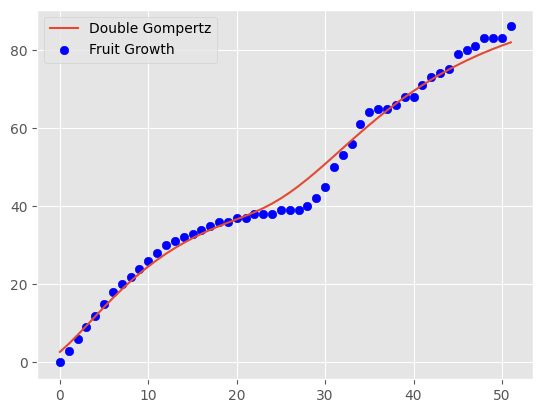

In [ ]:
# Predict
Y_test = DOBLE_GOMPERTZ(x_norm)

# Plot prediction against original data
plt.plot(x,Y_test,label='Double Gompertz')
plt.scatter(x,y,color='b',label='Fruit Growth')
plt.legend()
plt.show()



---



## References

[1] [Generalized Algebraic Difference Approach (GADA) Derivation](https://watermark.silverchair.com/forestscience0303.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAA3cwggNzBgkqhkiG9w0BBwagggNkMIIDYAIBADCCA1kGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMzAFTzOheKIUFYmqnAgEQgIIDKhXA5UIuVNJSArI4KXQv5J_1UPuPpDFph9_MCov0B0C1BJo_u8RKo2NsHxwTGhaKQcW3e7oH5F_FWAzYPJQsJdh6Nykfk02GNPUh9Bp5OfqPd6Mj7mK5yDZAgKb0fx_yxd5mGucrIaEui0pjOtBdFbRiKuERRQO8vHJ-jEGRFIXx1ou17ukAiNkmsS97weFJMD2Y6vDEUAqBIpWdPUZ8jovbff6w7sIZ2XKlCDZ79j0inf9RgtpuuIraxRtcxQpRnrn7BK3KyXeCS8l198BOj-0SSy5FCvCtb7yIzI9JpWfoLaO7QpPxsV700bUxtrMUoNKsVzxk-DmuKWgGEiYgx6dizrKJWZ-LWx8iyRrzNz1R2RQe8pXwA0fDtAQrPL5HIcePd4zY0shmQkCwNm1c5hRL36gMtPVRDpxBA5dN6dwznEvHNBHyMt0cWN5VW5Mnwu9iIG9vEm5ikxNqF2HpaB2eyucEjqbRvXO-1qniCvYhPuFLqX1lzIVAN9SP4EF_lwennV23aJVs-WdaORF9ZCqjLBbX85bczjF0xoxnckNeXcazXmCoi0TDNH7xMZg5qbnQEHdJ-90I-B5IulCk6a-Sp7HA5QdP0akvGt_Nb5TKHUTynR3hHbfzgxF7fQsrnuNXZ4dUcbIB8mwWjIeLEWpLFcLfcSQDw6RXDfF5nYeoS4izjxYyld0n0GEcamnfOtijMoqKEh6gARmEQU-HlOJOhGsOCjKBLwyKIsBLYkYsb7dJdLFd7nUppEXctQUQWZZAUfF-5ob8XZmPO8Fa6JIJ0cTkbPSpCq_ehh6Harg3g0mSUMVtFJgNsZy9JygC91Nce2Wn9DOl_1YoGbyAnVhPTOETUlPcYyRvEX8m-QXETowImGBHDMH4ikb3xjpUaBL34uwi1UlbkY_pRe6t6V6jS5vSWqT-B6D8Mic-L1LaGpzAmvgITnveTBXPngMHM2OR4fqQC5WM-6NoGnEQ4dpUndS0z5yKSZ5avys6njNctcZcDWttzE37wjSph2TcHnvoh2pId6K7jcaa_ADyuM-pIkm7CMx08McaSqEYRDZnfwGe6yAMXkqVJA)

[2] [Models of dominant height growth and site indexes: GADA Derivation](https://www.scielo.org.mx/scielo.php?pid=S1405-31952018000300437&script=sci_arttext_plus&tlng=en)

[3] [J. Panic, Michael, *Growth Curve Modeling: Theory and Applications*, January 2014](https://www.wiley.com/en-ae/Growth+Curve+Modeling%3A+Theory+and+Applications-p-9781118764046)

[4] [Towards Data Science: Gradient Descent Algortihm](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21)

[5] [Wikipedia: Gompertz Curve Model](https://en.wikipedia.org/wiki/Gompertz_function)




---


